# **Computer Lab 1 - Hugo Queniat**

In [2]:
#imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy import stats

## **Question 1**

In [3]:
#read and print data

with open('invest.txt') as file:
    table = pd.read_table(file, delim_whitespace=True, names=["year", "gnp", "invest", "cpi", "interest"], skiprows=1)
    display(table)



,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


## **Question 2**

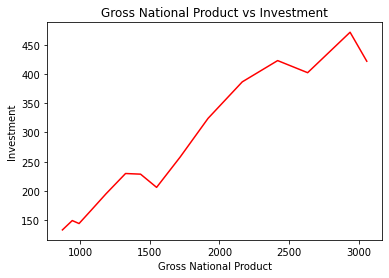

In [4]:
# Display a graph of investment vs gnp

plt.plot(table['gnp'], table['invest'], 'r-')
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.title('Gross National Product vs Investment')
plt.show()
%matplotlib inline


In [5]:
# Logarithm transforms of investment and gnp

x = np.log(table['gnp'])
y = np.log(table['invest'])



## **Question 3**

,Slope Estimator,Intercept Estimator,Slope Standard Deviation,Intercept Standard Deviation
0,1.015281,-1.963591,0.055383,0.409547


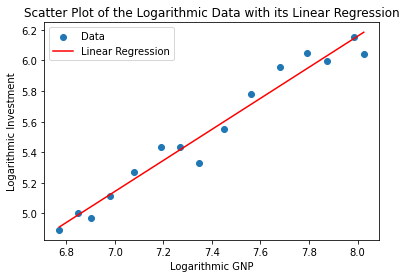

In [6]:
# Extimators
n = len(x)
x_mean = np.mean(x)
y_mean= np.mean(y)
x_least_squares = np.sum((x - x_mean)**2)

slope_estimator = np.sum((x - x_mean) * (y - y_mean)) / x_least_squares
intercept_estimator = y_mean - slope_estimator * x_mean

sigma2_estimator = (1 / (n - 2)) * np.sum((y - intercept_estimator - slope_estimator * x)**2)

slope_std_dev = np.sqrt(sigma2_estimator /x_least_squares)
intercept_std_dev = np.sqrt(sigma2_estimator * ((1 / n)+ x_mean**2 / x_least_squares))

results = {'Slope Estimator': slope_estimator, 
           'Intercept Estimator': intercept_estimator,
           'Slope Standard Deviation': slope_std_dev, 
           'Intercept Standard Deviation': intercept_std_dev}

df = pd.DataFrame(results, index=[0])
display(df)

plt.scatter(x, y, label = 'Data')
plt.plot(x, intercept_estimator + slope_estimator * x, color='red', label='Linear Regression')
plt.legend()
plt.xlabel('Logarithmic GNP')
plt.ylabel('Logarithmic Investment')
plt.title('Scatter Plot of the Logarithmic Data with its Linear Regression')
plt.show()



## **Question 4**

In [79]:
# Test for significance of slope

def t_p_value(t_statistic, df):
	return 2 * stats.t.cdf(-abs(t_statistic), df)

# Null hypothesis: slope = 0
null_hypothesis = 0

# Degrees of freedom
df = n - 2

# Test statistic
test_statistic = (slope_estimator - null_hypothesis) / slope_std_dev

# P-value
p_value = t_p_value(test_statistic, df)

print('The Student\'s t-test for H0: b1 = 0 returns the value of the test statistic')
print('t = {:.4f} with the p-value {:.4e}.'.format(test_statistic, p_value))


The Student's t-test for H0: b1 = 0 returns the value of the test statistic
t = 18.3320 with the p-value 1.1364e-10.


## **Question 5**

In [82]:
# GNP value 1000

x0 = np.log(1000)
y_est = intercept_estimator + slope_estimator * x0

# t_value for 90%
t_value = stats.t.ppf(0.95, df)

# Confidence interval at 90%
def conf(x):
    dev = np.sqrt(sigma2_estimator * ( ( 1 / n ) + (x - x_mean)**2 / x_least_squares ))
    return x - t_value * dev, x + t_value * dev

# Prediction interval at 90%

def pred(x):
    dev = np.sqrt(sigma2_estimator * ( 1 + ( 1 / n ) + (x - x_mean)**2 / x_least_squares ))
    return x - t_value * dev, x + t_value * dev 

# Results for GNP value 1000
confidence_interval = [conf(y_est)[0], conf(y_est)[1]]
prediction_interval = [pred(y_est)[0], pred(y_est)[1]]

print('The estimated value of y at x = 1000 is {:.4f}.'.format(np.exp(y_est)))
print('The 90% confidence interval for y at x = 1000 is [{:.4f}, {:.4f}].'.format(np.exp(confidence_interval[0]), np.exp(confidence_interval[1])))
print('The 90% prediction interval for y at x = 1000 is [{:.4f}, {:.4f}].'.format(np.exp(prediction_interval[0]), np.exp(prediction_interval[1])))




The estimated value of y at x = 1000 is 155.9794.
The 90% confidence interval for y at x = 1000 is [123.6366, 196.7830].
The 90% prediction interval for y at x = 1000 is [117.9555, 206.2608].


## **Question 6**

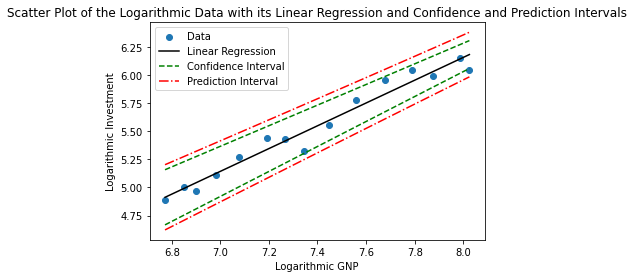

In [88]:
# Plotting estimation and confidence and prediction intervals

# Points to plot
x_est = np.linspace(np.min(x), np.max(x), 100)
y_est = intercept_estimator + slope_estimator * x_est

# Confidence
conf_low, conf_up = conf(y_est)

# Prediction
pred_low, pred_up = pred(y_est)

plt.scatter(x, y, label = 'Data')
plt.plot(x, intercept_estimator + slope_estimator * x, color='black', label='Linear Regression')
plt.plot(x_est, conf_low, 'g--', label='Confidence Interval')
plt.plot(x_est, conf_up, 'g--')
plt.plot(x_est, pred_low, 'r-.', label='Prediction Interval')
plt.plot(x_est, pred_up, 'r-.')
plt.legend()
plt.xlabel('Logarithmic GNP')
plt.ylabel('Logarithmic Investment')
plt.title('Scatter Plot of the Logarithmic Data with its Linear Regression and Confidence and Prediction Intervals')
plt.show()

